# **GoogleDriveのマウント**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/共有(島内先生)')
# 移動後のカレントディレクトリを表示
print("New Directory:", os.getcwd())

Mounted at /content/drive
New Directory: /content/drive/.shortcut-targets-by-id/1P9SZj8h_TRYGk8My9_UKazc_Q3Pn_PyN/共有(島内先生)


# **各種ライブラリのインポート**

In [2]:
# 必要なパッケージのインストール
!pip install dash japanize-matplotlib ipywidgets janome wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 37.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 115.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.4 MB/s eta 0:00:00
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=1d807624a24e1b43aa5801117b06915634290cbda798da14f0bd10c7ec4fc556
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


In [3]:
# 基本ライブラリ
import pandas as pd
import numpy as np
import json

# データの前処理とクラスタリング
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# 可視化用ライブラリ
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.font_manager as fm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import japanize_matplotlib
from wordcloud import WordCloud

# DashとPlotlyによるインタラクティブなグラフ描画
import plotly.express as px
from dash import Dash, dcc, html, Input, Output, State

# 日本語の形態素解析
from janome.tokenizer import Tokenizer

# Jupyter用インタラクティブウィジェット
from ipywidgets import interact, widgets

#**データ読み込み**
BERTで分散表現を作成した国会議事録のデータ

In [4]:
vecs = pd.read_csv('BERT/BERT_vecs.csv')
label = pd.read_csv('BERT/BERT11cullabels.csv')
df = pd.read_csv('DF_2018-2022.csv')
cluster_centers = np.load('BERT/BERT11cluster_centers.npy')

In [5]:
df2 = pd.merge(vecs, df, left_index=True, right_index=True, how='inner')
df3 = pd.merge(df2, label, left_index=True, right_index=True, how='inner')
df3

,0,1,2,3,4,5,6,7,8,9,...,765,766,767,日付,発言者名,発言内容,院名,会派,"性別(男1,女0)",cluster
0,0.323174,-0.116214,-0.466884,-0.233898,-0.104967,0.116708,-0.247526,-0.543202,-0.372323,0.145841,...,-0.341002,0.002150,0.121266,2018-06-08,舞立昇治,○舞立昇治君自由民主党の舞立昇治です,参議院,自由民主党・こころ,1,0
1,-0.058717,-0.448077,0.005181,-0.198316,0.098041,0.289395,0.065687,0.293976,0.096718,-0.125809,...,-0.236991,-0.313129,-0.150874,2018-06-08,舞立昇治,私は、自民・公明を代表し、ただいま議題となりました卸売市場法及び食品流通構造改善促進法の一部...,参議院,自由民主党・こころ,1,9
2,-0.149696,-0.576330,-0.206563,0.055211,0.204096,0.201052,0.101201,-0.084708,0.133620,-0.266313,...,-0.011392,-0.224500,-0.270332,2018-06-08,舞立昇治,我が国は、起伏に富んだ東西南北に広がる国土を有し、四方を海に囲まれ、様々な農林水産物に恵まれ...,参議院,自由民主党・こころ,1,2
3,-0.243121,-0.427530,-0.194267,-0.120151,-0.065622,0.349317,0.073371,0.021792,0.033753,-0.157062,...,-0.097562,-0.047341,-0.238307,2018-06-08,舞立昇治,また、農林水産物の生産に併せて様々な加工製造業も発展し、私たちの食卓は多種多品目の野菜、魚介...,参議院,自由民主党・こころ,1,2
4,0.016554,-0.088251,0.079740,-0.038632,0.254518,0.197446,0.106829,0.008467,-0.211911,-0.045411,...,-0.107701,0.186292,-0.055473,2018-06-08,舞立昇治,こうした私たちの豊かな食生活は、平成二十五年には和食がユネスコ文化遺産として認められるなど、...,参議院,自由民主党・こころ,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170496,0.077146,-0.148912,-0.305101,-0.160517,0.132396,0.122722,-0.039981,0.168867,-0.006610,-0.097780,...,-0.129802,0.163534,-0.081374,2022-01-19,小川淳也,それもこれも含めて、いよいよ百日間のハネムーン期間を終えた岸田政権は、このコロナ感染爆発の中...,衆議院,立憲民主党・無所属,1,5
170497,0.240404,-0.147413,-0.007703,-0.158539,0.135488,0.508342,-0.056292,0.353778,0.015210,-0.188699,...,-0.188666,0.077261,-0.236995,2022-01-19,小川淳也,と同時に、我々野党は、この不備に対してどう応えていくのか,衆議院,立憲民主党・無所属,1,5
170498,0.396329,-0.217531,0.080204,0.045041,-0.060024,0.343283,-0.092845,0.392257,0.027031,-0.163814,...,-0.141686,-0.094513,-0.046467,2022-01-19,小川淳也,国民に政権の選択肢として、受皿として認知していただくために、我々野党はどうすべきなのか,衆議院,立憲民主党・無所属,1,1
170499,0.324610,-0.370084,0.142441,-0.132408,0.051552,0.328665,0.031095,0.254140,-0.093738,-0.082836,...,-0.387608,-0.150857,-0.329447,2022-01-19,小川淳也,我々野党側の責任も極めて重い、そのことを申し上げ、質問を終わりたいと思います,衆議院,立憲民主党・無所属,1,1


---
---
# **データをプロット**

In [ ]:
# 特徴量の列を抽出
feature_columns = [str(i) for i in range(768)]
X = df3[feature_columns]

# ラベル列を取得（cluster列をラベルとして使用）
labels = df3['cluster']

## **3次元プロット**

In [ ]:
# PCAで3次元に次元削減
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

### 視点固定

<ipython-input-9-4e96a7cf76a6>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_labels))  # 'tab10'カラーマップを使って最大10色まで設定


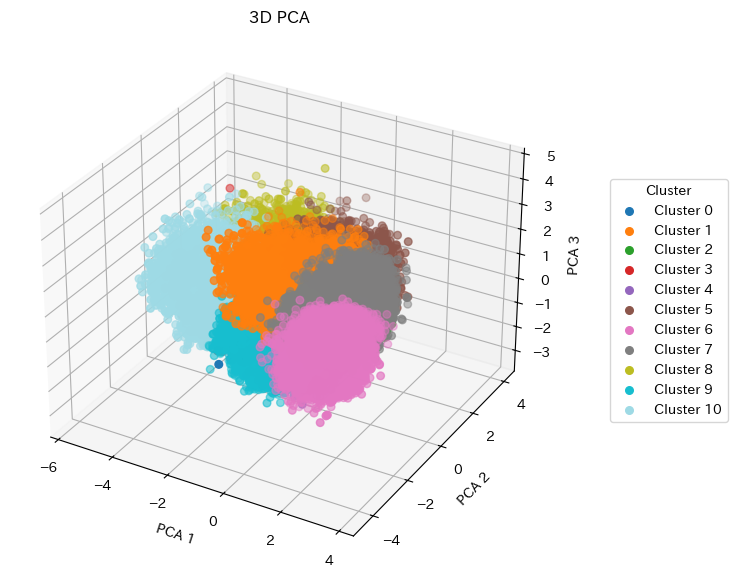

In [ ]:
# ラベルごとに異なる色を設定
unique_labels = np.unique(labels)
colors = plt.cm.get_cmap('tab20', len(unique_labels))  # 'tab10'カラーマップを使って最大10色まで設定

# プロット
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(unique_labels):
    indices = labels == label
    ax.scatter(X_pca_3d[indices, 0], X_pca_3d[indices, 1], X_pca_3d[indices, 2],
               color=colors(i), label=f'Cluster {label}', s=30)

ax.set_title('3D PCA')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), title="Cluster")

plt.show()


### 動的視点：全データ


In [ ]:
# DataFrameに変換してplotlyで扱いやすくする
df_pca = pd.DataFrame(X_pca_3d, columns=['PCA 1', 'PCA 2', 'PCA 3'])
df_pca['Cluster'] = labels
df_pca['発言者名'] = df3['発言者名']
df_pca['発言内容'] = df3['発言内容']

# プロット
fig = px.scatter_3d(
    df_pca, x='PCA 1', y='PCA 2', z='PCA 3', color='Cluster',
    color_discrete_sequence=px.colors.qualitative.T10,
    hover_data=['発言者名', '発言内容']
)

# マーカーサイズを小さく設定
fig.update_traces(marker=dict(size=3))  # サイズを小さくする

fig.update_layout(title='3D PCA with Smaller Marker Size')
fig.show()

### 動的視点：クラスタ別にサンプルして表示

In [ ]:


# 特徴量の列と追加する必要がある列
feature_columns = [str(i) for i in range(768)]
additional_columns = ['cluster', '発言者名', '発言内容']

# 特徴量列と追加列を合わせてサンプルを取得
df_sample = df3[feature_columns + additional_columns].sample(n=1000, random_state=42)

# サンプルから特徴量とラベルを分離
X_sample = df_sample[feature_columns]
labels_sample = df_sample['cluster']

# PCAで3次元に次元削減
pca_3d = PCA(n_components=3)
X_pca_3d_sample = pca_3d.fit_transform(X_sample)

# DataFrameに変換してplotlyで扱いやすくする
df_pca_sample = pd.DataFrame(X_pca_3d_sample, columns=['PCA 1', 'PCA 2', 'PCA 3'])
df_pca_sample['Cluster'] = labels_sample.values
df_pca_sample['発言者名'] = df_sample['発言者名'].values
df_pca_sample['発言内容'] = df_sample['発言内容'].values

# プロット
fig = px.scatter_3d(
    df_pca_sample, x='PCA 1', y='PCA 2', z='PCA 3', color='Cluster',
    color_discrete_sequence=px.colors.qualitative.T10,
    hover_data=['発言者名', '発言内容']
)

# マーカーサイズを小さく設定
fig.update_traces(marker=dict(size=3))  # サンプルのため少し大きめに設定

# レイアウトの更新
fig.update_layout(title='3D PCA with Cluster-Based Coloring')
fig.show()


### 動的視点：クラスタ別のクリックイベント表示
GoogleColabやpythonでは難しいかも


In [ ]:
# データ準備
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(df3[feature_columns])
df_pca = pd.DataFrame(X_pca_3d, columns=['PCA 1', 'PCA 2', 'PCA 3'])
df_pca['Cluster'] = df3['cluster']

# 各クラスタの重心を計算
cluster_centroids = df_pca.groupby('Cluster').mean().reset_index()


# カラーマップを取得し、色を16進数に変換
tab20_colors = [plt.cm.tab20(i) for i in range(20)]
tab20_colors_hex = [mcolors.to_hex(color) for color in tab20_colors]


# Dashアプリの作成
app = Dash(__name__)

# 初期プロット（クラスタごとの重心のみを表示）
fig = px.scatter_3d(cluster_centroids, x='PCA 1', y='PCA 2', z='PCA 3', color='Cluster',
                    color_discrete_sequence=tab20_colors_hex,
                    title="Cluster Centroids",
                    hover_name='Cluster')

# 軸範囲を固定
fig.update_layout(scene=dict(
    xaxis=dict(range=[df_pca['PCA 1'].min()-1, df_pca['PCA 1'].max()+1]),
    yaxis=dict(range=[df_pca['PCA 2'].min()-1, df_pca['PCA 2'].max()+1]),
    zaxis=dict(range=[df_pca['PCA 3'].min()-1, df_pca['PCA 3'].max()+1])
))

app.layout = html.Div([
    dcc.Graph(id='3d-scatter', figure=fig),
    html.Button("Reset", id="reset-btn", n_clicks=0),  # Resetボタンのクリック数を管理
    html.Div(id='cluster-detail')
])

# クリックで選択されたクラスタを保持するリスト
selected_clusters = []

# コールバック: クリックイベントで詳細データ点を表示
@app.callback(
    Output('3d-scatter', 'figure'),
    [Input('3d-scatter', 'clickData'), Input("reset-btn", "n_clicks")],
    [State('3d-scatter', 'figure')]
)
def display_cluster(clickData, reset_clicks, current_figure):
    global selected_clusters

    # リセットボタンが押された場合、初期表示に戻し、選択クラスタをリセット
    if reset_clicks > 0:
        selected_clusters = []
        return fig

    # クリックデータがある場合、選択されたクラスタを追加
    if clickData:
        cluster = int(clickData['points'][0]['hovertext'])
        if cluster not in selected_clusters:
            selected_clusters.append(cluster)

    # 選択されたクラスタの詳細データ点を表示
    if selected_clusters:
        cluster_data = df_pca[df_pca['Cluster'].isin(selected_clusters)]
        cluster_fig = px.scatter_3d(cluster_data, x='PCA 1', y='PCA 2', z='PCA 3', color='Cluster',
                                    color_discrete_sequence=tab20_colors_hex,
                                    title=f"Clusters {selected_clusters} Data Points")

        # 軸範囲を固定
        cluster_fig.update_layout(scene=dict(
            xaxis=dict(range=[df_pca['PCA 1'].min()-1, df_pca['PCA 1'].max()+1]),
            yaxis=dict(range=[df_pca['PCA 2'].min()-1, df_pca['PCA 2'].max()+1]),
            zaxis=dict(range=[df_pca['PCA 3'].min()-1, df_pca['PCA 3'].max()+1])
        ))

        return cluster_fig

    # リセットボタンを押さずにクリックイベントがない場合、現在のプロットを保持
    return current_figure

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

## **2次元プロット**

### 全クラスタを１フレームにプロット

<ipython-input-11-48fe7a4d4c52>:10: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



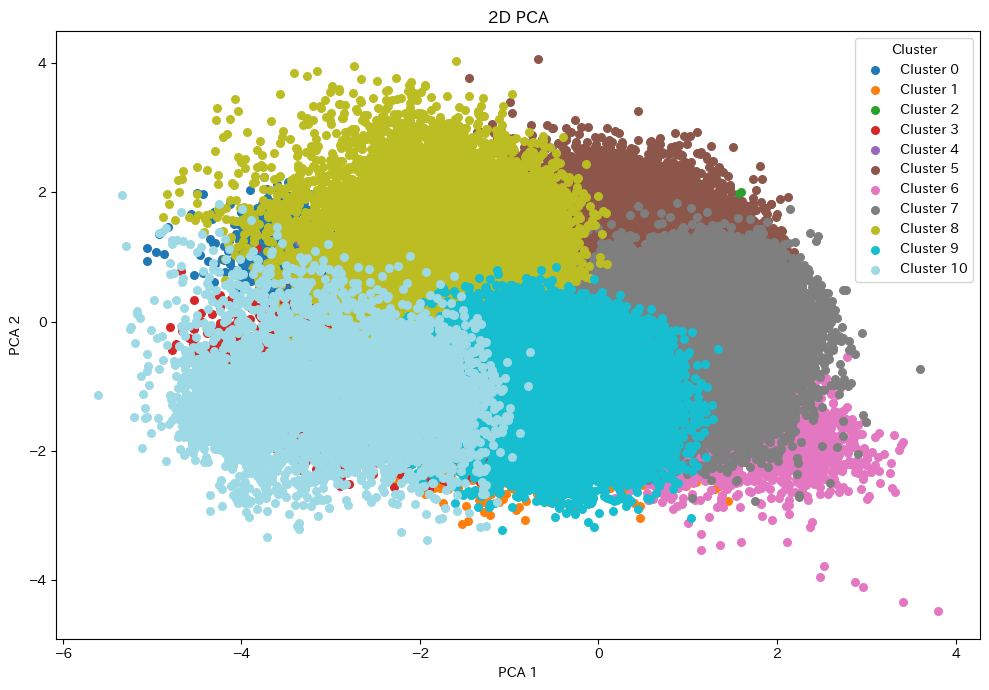

In [ ]:
# PCAで2次元に次元削減
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(df3[feature_columns])

# PCA後のデータをDataFrameに変換
df_pca_2d = pd.DataFrame(X_pca_2d, columns=['PCA 1', 'PCA 2'])
df_pca_2d['Cluster'] = df3['cluster']

# カラーマップを設定
colors = plt.cm.get_cmap('tab20', df_pca_2d['Cluster'].nunique())

# プロットの作成
plt.figure(figsize=(10, 7))
for i, cluster in enumerate(sorted(df_pca_2d['Cluster'].unique())):
    cluster_data = df_pca_2d[df_pca_2d['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA 1'], cluster_data['PCA 2'],
                color=colors(i), label=f'Cluster {cluster}', s=30)

# 軸ラベルとタイトルを設定
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2D PCA')

# 凡例をグラフの外側に配置
plt.legend(title="Cluster")

# グラフの表示
plt.tight_layout()
plt.show()

### 各クラスタを各フレームにプロット

<ipython-input-12-bcf640610654>:10: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



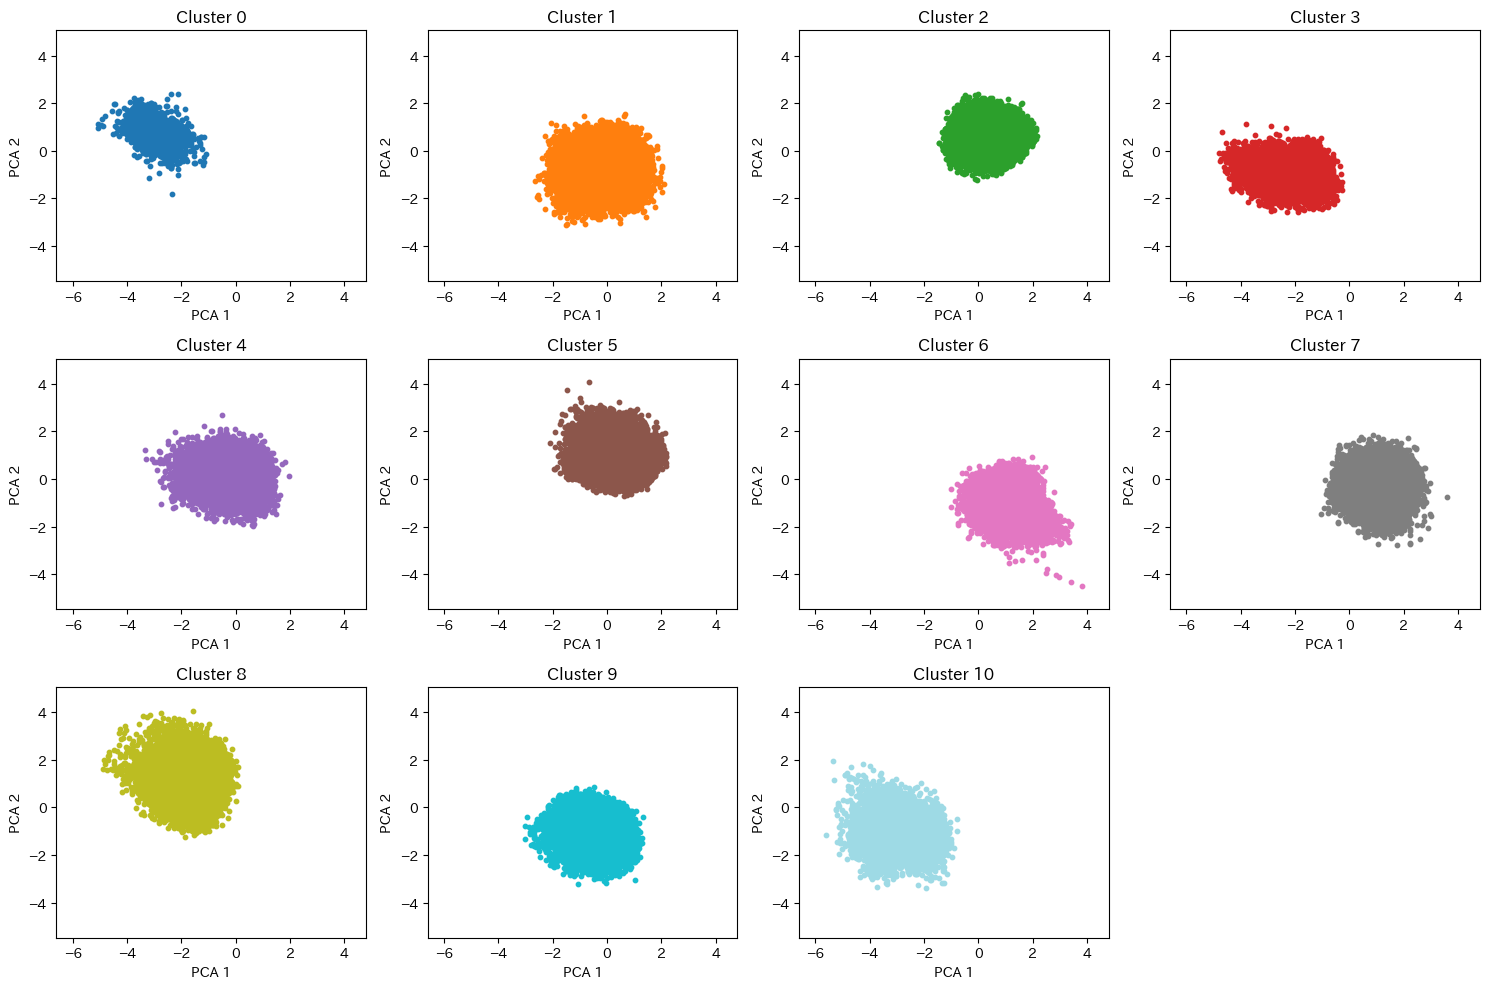

In [ ]:
# PCAで2次元に次元削減
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(df3[feature_columns])

# PCA後のデータをDataFrameに変換
df_pca_2d = pd.DataFrame(X_pca_2d, columns=['PCA 1', 'PCA 2'])
df_pca_2d['Cluster'] = df3['cluster']

# カラーマップを設定（'tab20'に変更して20色を利用）
colors = plt.cm.get_cmap('tab20', len(df_pca_2d['Cluster'].unique()))

# 軸の範囲を取得
x_min, x_max = df_pca_2d['PCA 1'].min() - 1, df_pca_2d['PCA 1'].max() + 1
y_min, y_max = df_pca_2d['PCA 2'].min() - 1, df_pca_2d['PCA 2'].max() + 1

# クラスタごとの2次元プロットを作成
num_clusters = df_pca_2d['Cluster'].nunique()
fig, axes = plt.subplots(3, 4, figsize=(15, 10))  # 3行4列のサブプロットで表示（11枚に合わせて）

for i, cluster in enumerate(sorted(df_pca_2d['Cluster'].unique())):
    ax = axes[i // 4, i % 4]  # グリッド配置
    cluster_data = df_pca_2d[df_pca_2d['Cluster'] == cluster]
    ax.scatter(cluster_data['PCA 1'], cluster_data['PCA 2'], s=10, color=colors(i), label=f'Cluster {cluster}')
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')

    # 軸の範囲を統一
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

# 残りの空のプロットを非表示にする
for j in range(i + 1, 12):
    fig.delaxes(axes[j // 4, j % 4])

plt.tight_layout()
plt.show()


# **3Dモデル作成用のデータ出力**

## サンプルして出力

In [6]:
# サンプルデータの数を調整（例えば100点に変更）
num_samples = 170501  # 必要なデータ点の数を指定
sample_df = df3.sample(n=num_samples, random_state=42)

# 数値ベクトルのカラム名を取得
vector_columns = [str(i) for i in range(768)]  # 768次元の数値ベクトル
vector_data = sample_df[vector_columns]

# PCAによる次元削減（3次元）
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(vector_data)

# 3次元座標をDataFrameに追加
sample_df['x'] = reduced_data[:, 0]
sample_df['y'] = reduced_data[:, 1]
sample_df['z'] = reduced_data[:, 2]

# 必要なカラムを選択
export_df = sample_df[['発言内容', 'cluster', '会派', '性別(男1,女0)', 'x', 'y', 'z', '発言者名', '日付']]

# カラム名の英語化
export_df.rename(columns={
    '発言内容': 'speech',
    'cluster': 'cluster',
    '会派': 'party',
    '性別(男1,女0)': 'gender',  # 性別(男1,女0)を直接'gender'にリネーム
    'x': 'x',
    'y': 'y',
    'z': 'z',
    '発言者名': 'speaker_name',
    '日付':'date'
}, inplace=True)

# DataFrameを辞書のリストに変換
data_list = export_df.to_dict(orient='records')

# JSONファイルとして保存
output_path = "/content/drive/MyDrive/daydata.json"
with open(output_path, 'w', encoding='utf-8') as f:
    json.dump(data_list, f, ensure_ascii=False, indent=4)

print(f"データが保存されました: {output_path}")

<ipython-input-6-3f93973d9f6b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  export_df.rename(columns={


データが保存されました: /content/drive/MyDrive/daydata.json


---
---
---
---
# **各データの表示**
* 発言率
* ワードクラウド
など...



## **それぞれの割合**

* 女性の発言率

In [ ]:
l=[]

for k in range(11):
  wmean = 1-sum(df3[df3["cluster"]==k]["性別(男1,女0)"])/sum(df3["cluster"]==k)
  print("クラスタ",k,': 女性の発言率',wmean)
  l.append(wmean)
print('平均値:',np.mean(l))
print('標準偏差:',np.std(l))

クラスタ 0 : 女性の発言率 0.2288461538461538
クラスタ 1 : 女性の発言率 0.1330748035513828
クラスタ 2 : 女性の発言率 0.17573332451469958
クラスタ 3 : 女性の発言率 0.04575636846553177
クラスタ 4 : 女性の発言率 0.17124081948202552
クラスタ 5 : 女性の発言率 0.19665409818062007
クラスタ 6 : 女性の発言率 0.13113413304252997
クラスタ 7 : 女性の発言率 0.08406872456146675
クラスタ 8 : 女性の発言率 0.2050168476226133
クラスタ 9 : 女性の発言率 0.18053547678251314
クラスタ 10 : 女性の発言率 0.18138634764250527
平均値: 0.15758609979018565
標準偏差: 0.05193884685269112


* クラスタ内の発言数とクラスタの割合

In [ ]:
print("総発言数：",len(df3))
for k in range(11):
  print("クラスタ",k, ": 発言数",df3[df3["cluster"]==k].shape[0], "発言の割合", df3[df3["cluster"]==k].shape[0]/len(df3)*100 ,"%")

総発言数： 170501
クラスタ 0 : 発言数 2080 発言の割合 1.2199341939343464 %
クラスタ 1 : 発言数 9799 発言の割合 5.747180368443587 %
クラスタ 2 : 発言数 30239 発言の割合 17.735379851144568 %
クラスタ 3 : 発言数 8283 発言の割合 4.858036023249131 %
クラスタ 4 : 発言数 10348 発言の割合 6.069172614823374 %
クラスタ 5 : 発言数 27317 発言の割合 16.021606911396415 %
クラスタ 6 : 発言数 18340 発言の割合 10.756535152286496 %
クラスタ 7 : 発言数 27763 発言の割合 16.28318895490349 %
クラスタ 8 : 発言数 13355 発言の割合 7.8327986346121135 %
クラスタ 9 : 発言数 17293 発言の割合 10.142462507551276 %
クラスタ 10 : 発言数 5684 発言の割合 3.333704787655204 %


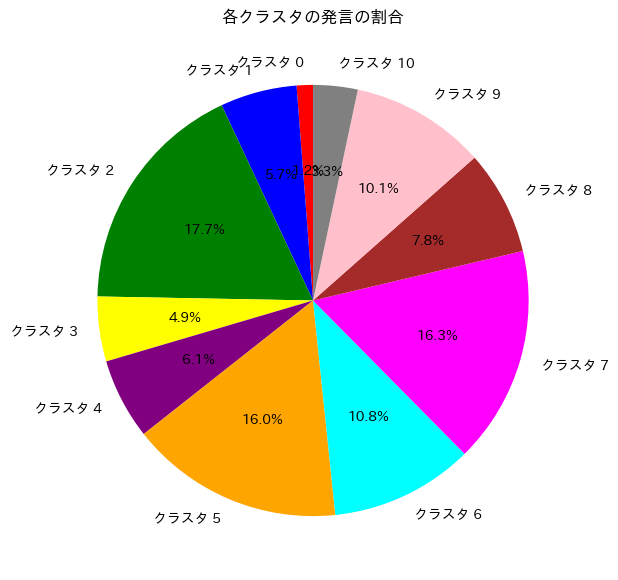

In [ ]:

# クラスタの発言数
cluster_counts = [df3[df3["cluster"]==k].shape[0] for k in range(11)]
# 総発言数
total_count = len(df3)
# 各クラスタの発言の割合
sizes = [count / total_count * 100 for count in cluster_counts]

labels = [f'クラスタ {k}' for k in range(11)]

# 各クラスタに割り当てる色
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'pink', 'gray']

fig = plt.figure(figsize=(7, 7))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('各クラスタの発言の割合')
plt.show()

## **クラスタの中心**

In [ ]:
cluster_centers

array([[0.26688821, 0.27775449, 0.89189632, 0.64559346, 0.61989531],
       [0.70972966, 0.83195051, 0.28384853, 0.52088752, 0.76881535],
       [0.77021534, 0.23285351, 0.24767585, 0.18686129, 0.32598533],
       [0.23909514, 0.85052551, 0.61914703, 0.7297612 , 0.42832556],
       [0.27192683, 0.6088639 , 0.17557804, 0.15485418, 0.29743128],
       [0.74941675, 0.80700585, 0.74810446, 0.27405449, 0.308409  ],
       [0.45777791, 0.34435098, 0.69115811, 0.16612033, 0.84263803],
       [0.16527175, 0.22498845, 0.27481154, 0.59839941, 0.82248529],
       [0.67794667, 0.21127301, 0.80403477, 0.69698118, 0.28026794],
       [0.72988645, 0.52152192, 0.12772937, 0.62530506, 0.2227337 ],
       [0.70739258, 0.28186222, 0.25198042, 0.8079204 , 0.82603481]])

In [ ]:
# クラスタごとの中心の抽出
for cluster_id in range(11):
    cluster_indices = np.where(label == cluster_id)[0]
    cluster_center = cluster_centers[cluster_id]

    similarities = cosine_similarity(vecs.iloc[cluster_indices], [cluster_center])
    most_similar_indices = cluster_indices[np.argsort(similarities[:, 0])[::-1][:10]]

    print(f"クラスタ {cluster_id} に近い順位上位10の文章:")
    for idx in most_similar_indices:
        print(df3["発言内容"].iloc[idx])
    print()

<ipython-input-27-acc37e9b872d>:3: DeprecationWarning:

Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.



ValueError: Found array with 0 sample(s) (shape=(0, 768)) while a minimum of 1 is required by check_pairwise_arrays.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# クラスタごとの中心を取得
cluster_centers = kmeans.cluster_centers_

# クラスタ数を設定（例：11クラスタ）
num_clusters = 11

# クラスタごとの文章抽出
for cluster_id in range(num_clusters):
    # クラスタ内のデータインデックスを取得
    cluster_indices = np.where(kmeans.labels_ == cluster_id)[0]
    cluster_center = cluster_centers[cluster_id]

    # クラスタ内データのベクトルを取得
    cluster_vecs = vecs.iloc[cluster_indices].values  # .values を使いNumPy配列に変換

    # クラスタ中心との類似度を計算
    similarities = cosine_similarity(cluster_vecs, [cluster_center])

    # 類似度が高い順に並べ、上位10件を取得
    most_similar_indices = cluster_indices[np.argsort(similarities[:, 0])[::-1][:10]]

    # クラスタ内の上位10件の文章を出力
    print(f"クラスタ {cluster_id} に近い順位上位10の文章:")
    for idx in most_similar_indices:
        print(df3["発言内容"].iloc[idx])
    print()


ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 768 while Y.shape[1] == 5

## **ワードクラウド**

In [ ]:
## 関数群の定義
def get_nouns(sentence, noun_list):
    for token in t.tokenize(sentence):
        split_token = token.part_of_speech.split(',')
        ## 一般名詞を抽出
        if split_token[0] == '名詞' and split_token[1] == '一般':
            noun_list.append(token.surface)

def depict_word_cloud(noun_list):
    ## 名詞リストの要素を空白区切りにする(word_cloudの仕様)
    noun_space = ' '.join(map(str, noun_list))
    ## word cloudの設定(フォントの設定), stopward
    wc = WordCloud(background_color="white", font_path=r"/content/drive/MyDrive/msgothic.ttc", width=300,height=300,
                   stopwords={
                      "委員","制度","政府","内閣","大臣","法案","法律","事業","総理","国会","国民","我が国","議員",
                      "国","社会","皆さん","皆様","皆さま","全力","対象","状況"
                      })
    wc.generate(noun_space)
    ## 出力画像の大きさの指定
    plt.figure(figsize=(5,5))
    ## 目盛りの削除
    plt.tick_params(labelbottom=False,
                    labelleft=False,
                    labelright=False,
                    labeltop=False,
                   length=0)
    ## word cloudの表示
    plt.imshow(wc)
    plt.show()

In [ ]:
print("総発言数：",len(df))
for k in range(11):

    # ワードクラウド
    print("クラスタ",k, ": 発言数",df3[df3["cluster"]==k].shape[0], "総発言数に対してのクラスタ", k, "の発言の割合", df3[df3["cluster"]==k].shape[0]/len(df3)*100 ,"%")
    t = Tokenizer()
    noun_list = []
    for sentence in list(df3[df3['cluster']==k]['発言内容']):
        get_nouns(sentence, noun_list)
    depict_word_cloud(noun_list)

    #クラスタの中心
    cluster_indices = np.where(label == k)[0]
    cluster_center = cluster_centers[k]

    similarities = cosine_similarity(vecs.iloc[cluster_indices], [cluster_center])
    most_similar_indices = cluster_indices[np.argsort(similarities[:, 0])[::-1][:5]]

    print(f"クラスタ {k} の中心に近い上位5つの発言:")
    df3_df = []
    for idx in most_similar_indices:
        print(df3["発言内容"].iloc[idx])
    print('\n\n')

総発言数： 170501
クラスタ 0 : 発言数 2080 総発言数に対してのクラスタ 0 の発言の割合 1.2199341939343464 %


OSError: cannot open resource

## **各議員の発言**

In [ ]:
1+1

2

In [ ]:
name = df3["発言者名"]
name_list =  name.drop_duplicates()

selected_name = None

# ドロップダウンメニューを表示
@interact(name=widgets.Dropdown(options=name_list, description='名前'))

def select_name(name):
    global selected_name
    selected_name = name
    df1 = df3[df3["発言者名"] == selected_name].copy()
    print("\n", selected_name, "議員 の総発言回数：", len(df1), "回\n" )

    # クラスタの発言数
    cluster_counts = [df1[df1["cluster"]==k].shape[0] for k in range(11)]
    # 総発言数
    total_count = len(df1)
    # 各クラスタの発言の割合
    sizes = [count / total_count * 100 for count in cluster_counts]

    labels = [f'クラスタ {k}' for k in range(11)]
    # 各クラスタに割り当てる色
    colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'pink', 'gray']

    non_zero_labels = [label for label, size in zip(labels, sizes) if size != 0]
    non_zero_sizes = [size for size in sizes if size != 0]

    fig = plt.figure(figsize=(7, 7))
    plt.pie(non_zero_sizes, labels=non_zero_labels, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(f"{selected_name} 議員の各クラスタの発言の割合")
    plt.show()

    if non_zero_sizes:
      df1['日付'] = pd.to_datetime(df1['日付'])
      df1['年'] = df1['日付'].dt.year

      # クラスタごとに年別発言数をカウント
      cluster_yearly_counts = df1.groupby(['cluster', '年']).size().reset_index(name='発言数')

      # グラフの描画
      plt.figure(figsize=(8, 6))
      sns.barplot(x='年', y='発言数', hue='cluster', data=cluster_yearly_counts, palette=colors)
      plt.title(f"{selected_name} 議員の年別クラスタ別発言数の比較")
      plt.xlabel('year')
      plt.ylabel('発言数')
      plt.legend(title='クラスタ', title_fontsize='15', bbox_to_anchor=(1.05, 1), loc='upper left')
      plt.show()

interactive(children=(Dropdown(description='名前', options=('舞立昇治', '河野太郎', '斉藤鉄夫', '谷公一', '岡田直樹', '後藤茂之', '鈴木俊一…